## Diabetes Health Indicators

### Analiza indikatora dijabetesa

Podaci se svake godine prikupljaju tako što učesnici popunjavaju anketu.  
Anketa prikuplja odgovore od preko 400.000 Amerikanaca o rizičnom ponašanju u vezi sa zdravljem. Sprovodi se svake godine od 1984. godine.

In [1]:
import numpy as np 
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, average_precision_score, roc_auc_score, roc_curve, confusion_matrix, auc, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from warnings import filterwarnings
filterwarnings('ignore')

In [102]:
diabetes_data = pd.read_csv('diabetes_012_health_indicators.csv')

In [103]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
diabetes_data.shape

(253680, 22)

Imamo 253680 instanci i 22 atributa.

In [5]:
diabetes_data.sample(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
204237,0.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,1.0,4.0,1.0,0.0,10.0,5.0,2.0
216060,0.0,1.0,0.0,1.0,34.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,15.0,0.0,0.0,0.0,8.0,5.0,6.0
18326,2.0,0.0,1.0,1.0,38.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,15.0,0.0,0.0,0.0,7.0,4.0,1.0
70802,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,10.0,3.0,5.0
191074,0.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
41398,2.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,5.0,1.0,0.0,13.0,5.0,1.0
21504,0.0,1.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,4.0,8.0
186515,2.0,0.0,1.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,6.0,6.0
120640,0.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,3.0,3.0
218189,0.0,0.0,1.0,0.0,30.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,6.0,8.0


In [6]:
diabetes_data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Kolona 'Diabetes_012' može da se preimenuje u 'Diabetes_Type'

In [105]:
diabetes_data.rename(columns={'Diabetes_012': 'Diabetes_Type'}, inplace=True)
diabetes_data.head()

,Diabetes_Type,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Ovaj dataset nema vrednosti koje nedostaju:

In [8]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_Type         253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
diabetes_data.isnull().any().sum()

0

In [10]:
diabetes_data.isna().sum()

Diabetes_Type           0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Jedinsvene vrednosti za svaki atribut:

In [11]:
diabetes_data.nunique()

Diabetes_Type            3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

Postoje 3 klase:

In [12]:
diabetes_data.Diabetes_Type.unique()

array([0., 2., 1.])

0 = nije dijabetes, 1 = predijabetes, 2 = dijabetes

## Ostali atributi

#HighBP  
0 = no high blood preasure 1 = high blood presure  
#HighChol  
0 = no high cholesterol 1 = high cholesterol  
#CholCheck  
0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years  
#BMI  
Body Mass Index  
#Smoker  
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes  
#Stroke  
(Have you ever had a stroke. 0 = no 1 = yes  
#HeartDiseaseorAttack  
Coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes  
#PhysActivity  
Physical activity in past 30 days - not including job 0 = no 1 = yes   
#Fruits  
Consume Fruit 1 or more times per day 0 = no 1 = yes  
#Veggies  
Consume Vegetables 1 or more times per day 0 = no 1 = yes  
#HvyAlcoholConsump  
Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes  
#AnyHealthcare  
Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes  
#NoDocbcCost  
Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes  
#GenHlth   
Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor  
#MentHlth  
Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days  
#PhysHlth  
Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days  
#DiffWalk  
Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes  
#Sex  
0 = female 1 = male   
#Age  
13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older   
#Education  Education level (EDUCA see codebook)   
scale 1-6    
1 = Never attended school or only kindergarten   
2 = Grades 1 through 8 (Elementary)   
3 = Grades 9 through 11 (Some high school)   
4 = Grade 12 or GED (High school graduate)   
5 = College 1 year to 3 years (Some college or technical school)   
6 = College 4 years or more (College graduate)   
#Income  
Income scale (INCOME2 see codebook)   
scale 1-8   
1 = < 10,000    
5 = < 35,000   
8 = > 75,000

In [13]:
diabetes_data.describe()

,Diabetes_Type,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [14]:
Diabetes=diabetes_data['Diabetes_Type']
Diabetes.value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_Type, dtype: int64

Vidimo da dataset nije balansiran, imamo 213703 instanci koje pripadaju klasi 0, 35346 klasi 2 i 4632 klasi 1.

<AxesSubplot:ylabel='Diabetes_Type'>

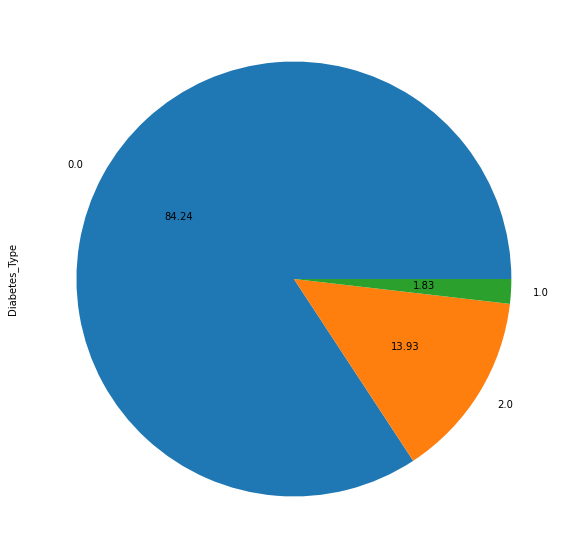

In [15]:
Diabetes.value_counts().plot.pie(figsize=(10, 10), autopct='%.2f')

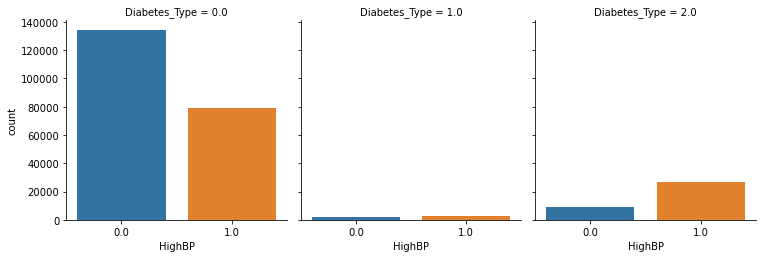

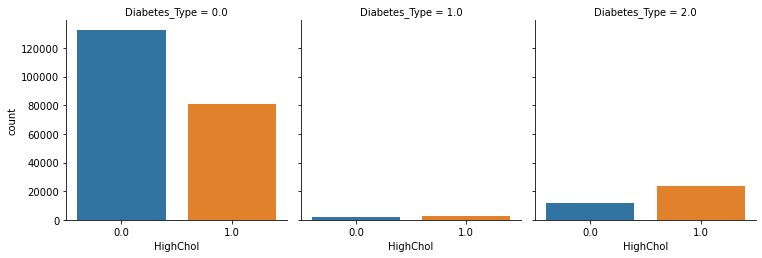

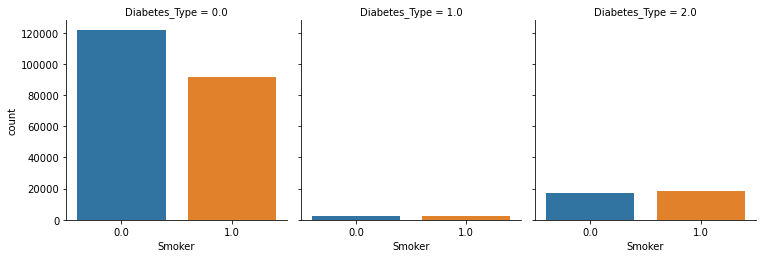

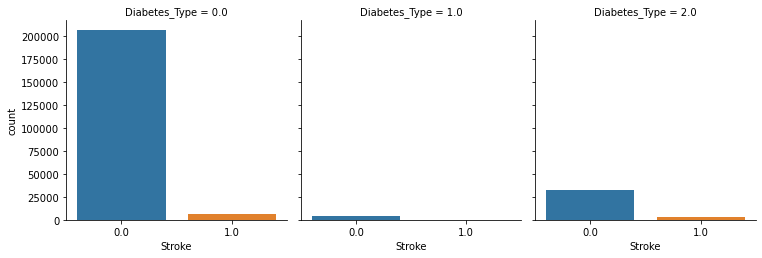

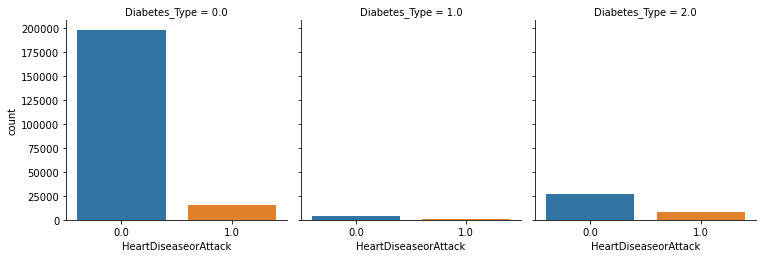

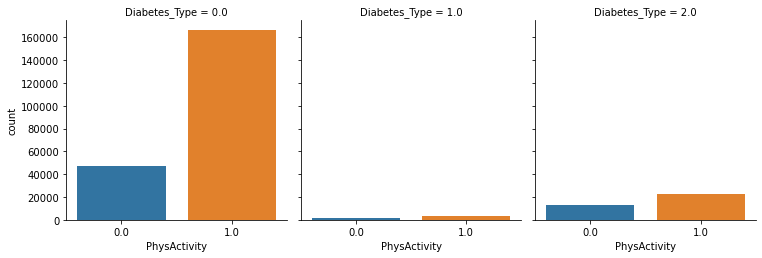

In [16]:
col = ['HighBP','HighChol','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity']

for i, col in enumerate(col):
    sns.catplot(x=col, col='Diabetes_Type', col_wrap=3,data=diabetes_data, kind="count", height=3.5, aspect=1)

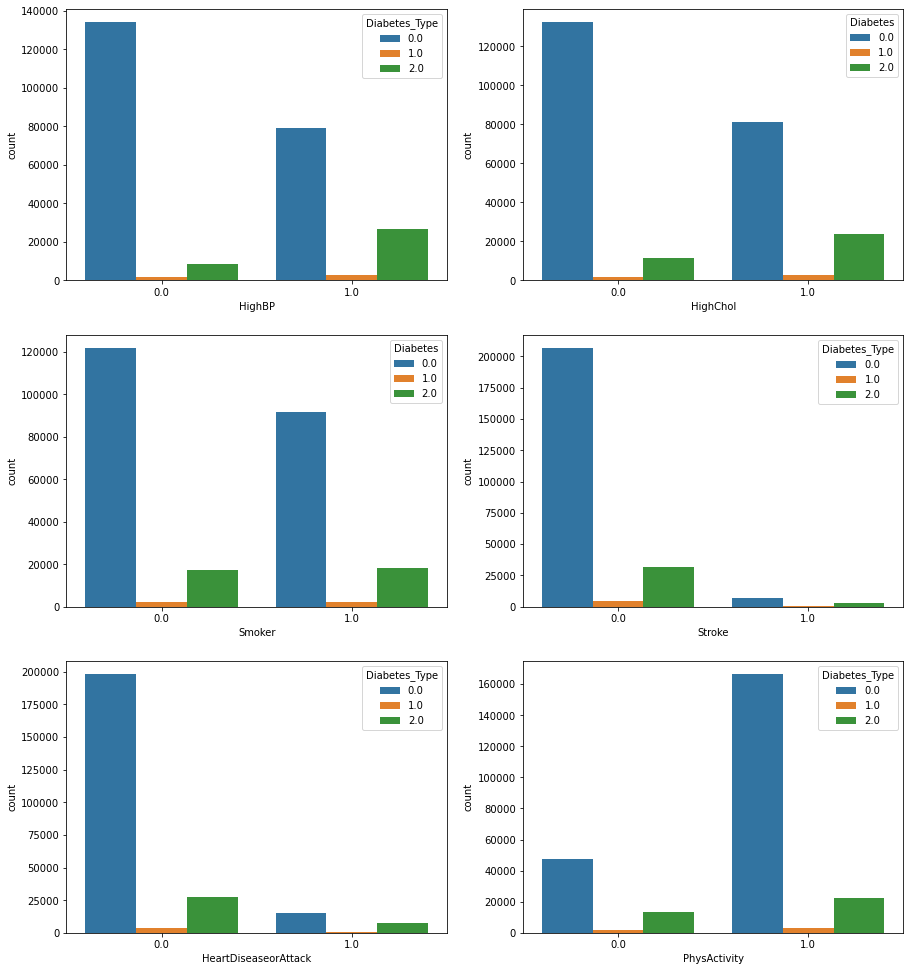

In [17]:
cols = ['HighBP','HighChol','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity']
fig, ax = plt.subplots(6, 2, figsize = (15, 35))
for indx, (column, axes) in list(enumerate(list(zip(cols, ax.flatten())))):
    if column not in 'Diabetes_Type':
        sns.countplot(ax = axes, x = diabetes_data[column], hue = diabetes_data['Diabetes_Type'], alpha = 1)  
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]   
axes_legend = ax.flatten()
axes_legend[1].legend(title = 'Diabetes', loc = 'upper right')
axes_legend[2].legend(title = 'Diabetes', loc = 'upper right')
plt.show()

Možemo zaključiti da je za ljude sa visokim holesterolom i visokim krvnim pritiskom šansa da boluju od dijabetisa velika, dok je za ljudi koji se bave fizičkom aktivnošcu mala.

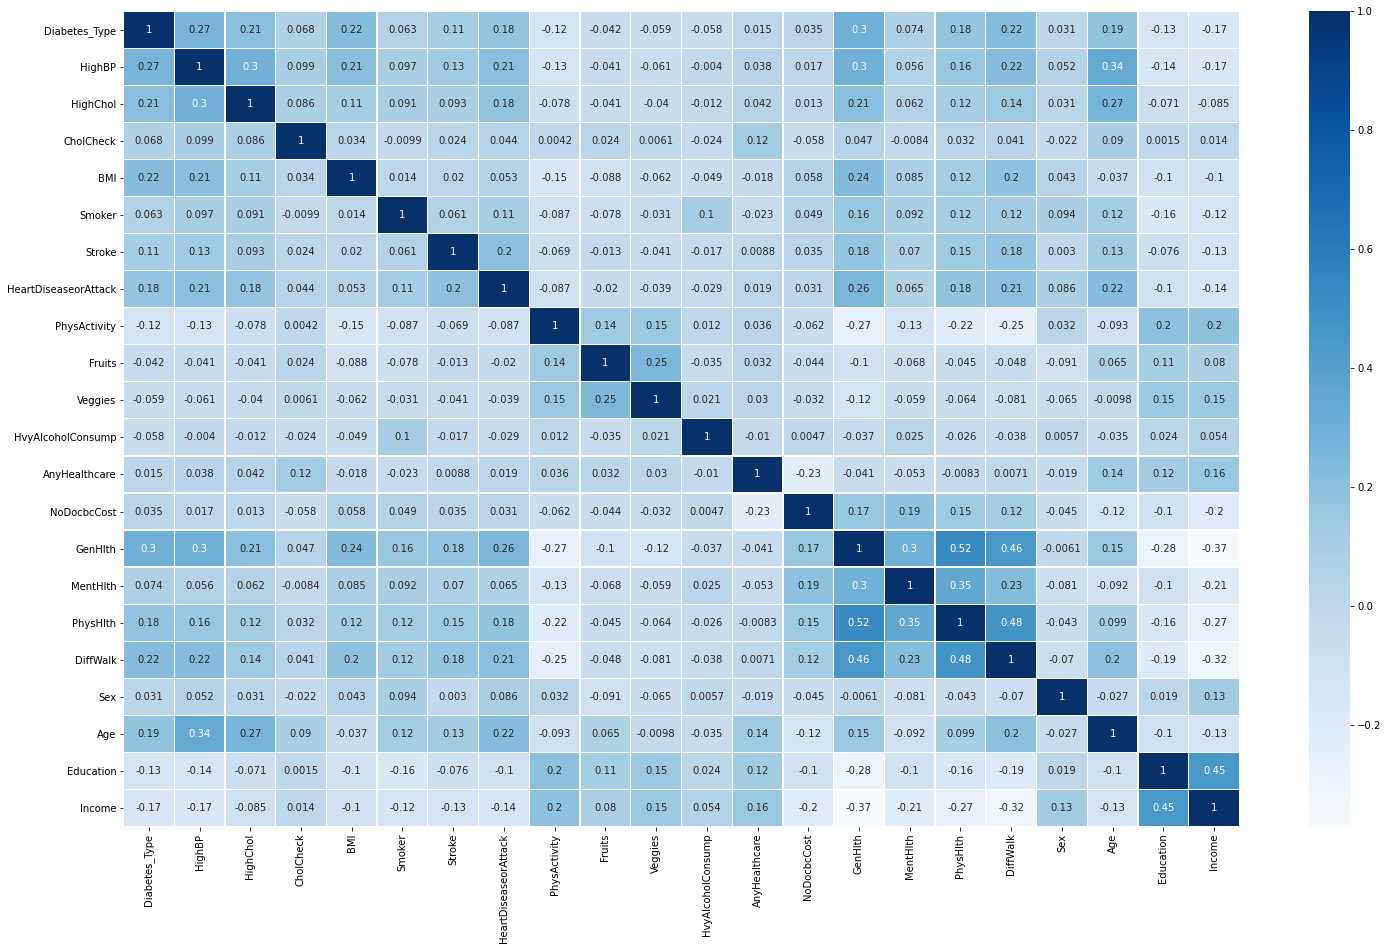

In [18]:
corr = diabetes_data.corr()
fig, ax = plt.subplots(figsize=(25,15)) 
sns.heatmap(corr,annot=True, cmap = "Blues", linewidth = 0.30)
plt.show()

## Transformacija dataseta

Podaci su integer tipa, pa možemo da ih prevedemo u integer:

In [106]:
diabetes_data['Diabetes_Type'] = diabetes_data['Diabetes_Type'].astype('int')
diabetes_data['HighBP'] = diabetes_data['HighBP'].astype('int')
diabetes_data['HighChol'] = diabetes_data['HighChol'].astype('int')
diabetes_data['CholCheck'] = diabetes_data['CholCheck'].astype('int')
diabetes_data['BMI'] = diabetes_data['BMI'].astype('int')
diabetes_data['Smoker'] = diabetes_data['Smoker'].astype('int')
diabetes_data['Stroke'] = diabetes_data['Stroke'].astype('int')
diabetes_data['HeartDiseaseorAttack'] = diabetes_data['HeartDiseaseorAttack'].astype('int')
diabetes_data['PhysActivity'] = diabetes_data['PhysActivity'].astype('int')
diabetes_data['Fruits'] = diabetes_data['Fruits'].astype('int')
diabetes_data['Veggies'] = diabetes_data['Veggies'].astype('int')

diabetes_data['HvyAlcoholConsump'] = diabetes_data['HvyAlcoholConsump'].astype('int')
diabetes_data['AnyHealthcare'] = diabetes_data['AnyHealthcare'].astype('int')
diabetes_data['NoDocbcCost'] = diabetes_data['NoDocbcCost'].astype('int')
diabetes_data['GenHlth'] = diabetes_data['GenHlth'].astype('int')
diabetes_data['MentHlth'] = diabetes_data['MentHlth'].astype('int')
diabetes_data['PhysHlth'] = diabetes_data['PhysHlth'].astype('int')
diabetes_data['DiffWalk'] = diabetes_data['DiffWalk'].astype('int')
diabetes_data['Sex'] = diabetes_data['Sex'].astype('int')
diabetes_data['Age'] = diabetes_data['Age'].astype('int')
diabetes_data['Education'] = diabetes_data['Education'].astype('int')
diabetes_data['Income'] = diabetes_data['Income'].astype('int')
diabetes_data.head()

,Diabetes_Type,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [107]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_Type         253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

Pošto dataset nije balansiran i klasa 1 (1 = predijabetes) ima najmanje instanci, možemo da računamo klasu 1 kao disabetes (klasa 2).

In [108]:
diabetes_data['Diabetes_Type'].replace({2.0: 1.0},inplace = True)

In [109]:
Diabetes=diabetes_data['Diabetes_Type']
Diabetes.value_counts()

0.0    213703
1.0     39977
Name: Diabetes_Type, dtype: int64

In [110]:
diabetes_data['Diabetes_Type'] = diabetes_data['Diabetes_Type'].astype('int')

BMI atribut ima najvise jedinstvenih vrednosti:

In [111]:
diabetes_data.BMI.unique()

array([40, 25, 28, 27, 24, 30, 34, 26, 33, 21, 23, 22, 38, 32, 37, 31, 29,
       20, 35, 45, 39, 19, 47, 18, 36, 43, 55, 49, 42, 17, 16, 41, 44, 50,
       59, 48, 52, 46, 54, 57, 53, 14, 15, 51, 58, 63, 61, 56, 74, 62, 64,
       66, 73, 85, 60, 67, 65, 70, 82, 79, 92, 68, 72, 88, 96, 13, 81, 71,
       75, 12, 77, 69, 76, 87, 89, 84, 95, 98, 91, 86, 83, 80, 90, 78])

Text(0, 0.5, 'BMI')

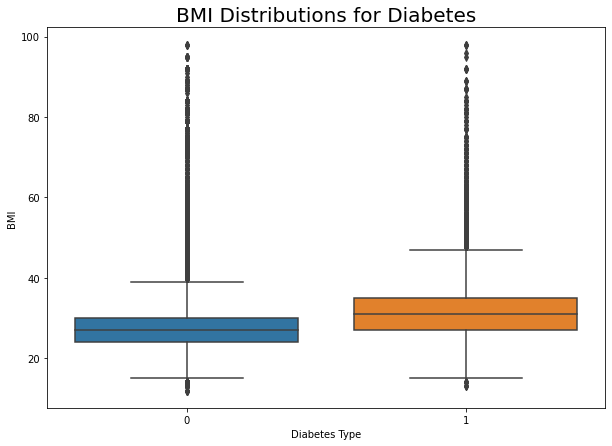

In [112]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Diabetes_Type', y='BMI', data=diabetes_data, orient='v')
plt.title('BMI Distributions for Diabetes', fontsize=20)
plt.xlabel('Diabetes Type')
plt.ylabel('BMI')

Za BMi imamo veliki broj outlier-a, sto se vidi na boxplot-u iznad.

Znamo da se BMI može podeliti u grupe:

    Underweight: BMI manji od 18.5 - grupa 1
    Normal weight: BMI izmedju 18.5 i 24.9 - grupa 2
    Overweight: BMI izmedju 25 i 29.9 - grupa 3
    Obesity: BMI izmedju 30 i 39.9 - grupa 4
    Extreme obesity: BMI veći od 40 - grupa 5


Podelimo vrednosti BMI-a u ove grupe:

In [113]:
diabetes_data['BMI_group'] = pd.cut(diabetes_data['BMI'], (0, 18.5, 25, 30, 40, np.inf), labels=[1, 2, 3, 4, 5])

In [114]:
diabetes_data.head()

,Diabetes_Type,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_group
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,4
1,0,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,2
2,0,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,3
3,0,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,3
4,0,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,2


In [115]:
diabetes_data.BMI = diabetes_data['BMI_group']
diabetes_data.drop('BMI_group', axis=1, inplace=True)
diabetes_data.head()

,Diabetes_Type,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,4,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,2,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,3,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,3,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,2,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [116]:
diabetes_data['BMI'] = diabetes_data['BMI'].astype('int')

Text(0, 0.5, 'BMI Groups')

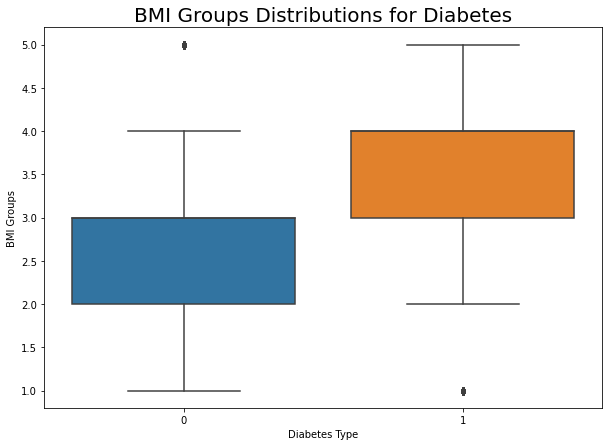

In [117]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Diabetes_Type', y='BMI', data=diabetes_data, orient='v')
plt.title('BMI Groups Distributions for Diabetes', fontsize=20)
plt.xlabel('Diabetes Type')
plt.ylabel('BMI Groups')

Nakon grupisanja BMI-a, možemo jasnije da sagledamo odnos BMI-a i dijabetesa. VIdimo da ljudi iz grupe 3 (overweight) i 4 (obese) imaju velike šanse da obole od dijabetesa.

Provera korelacije:

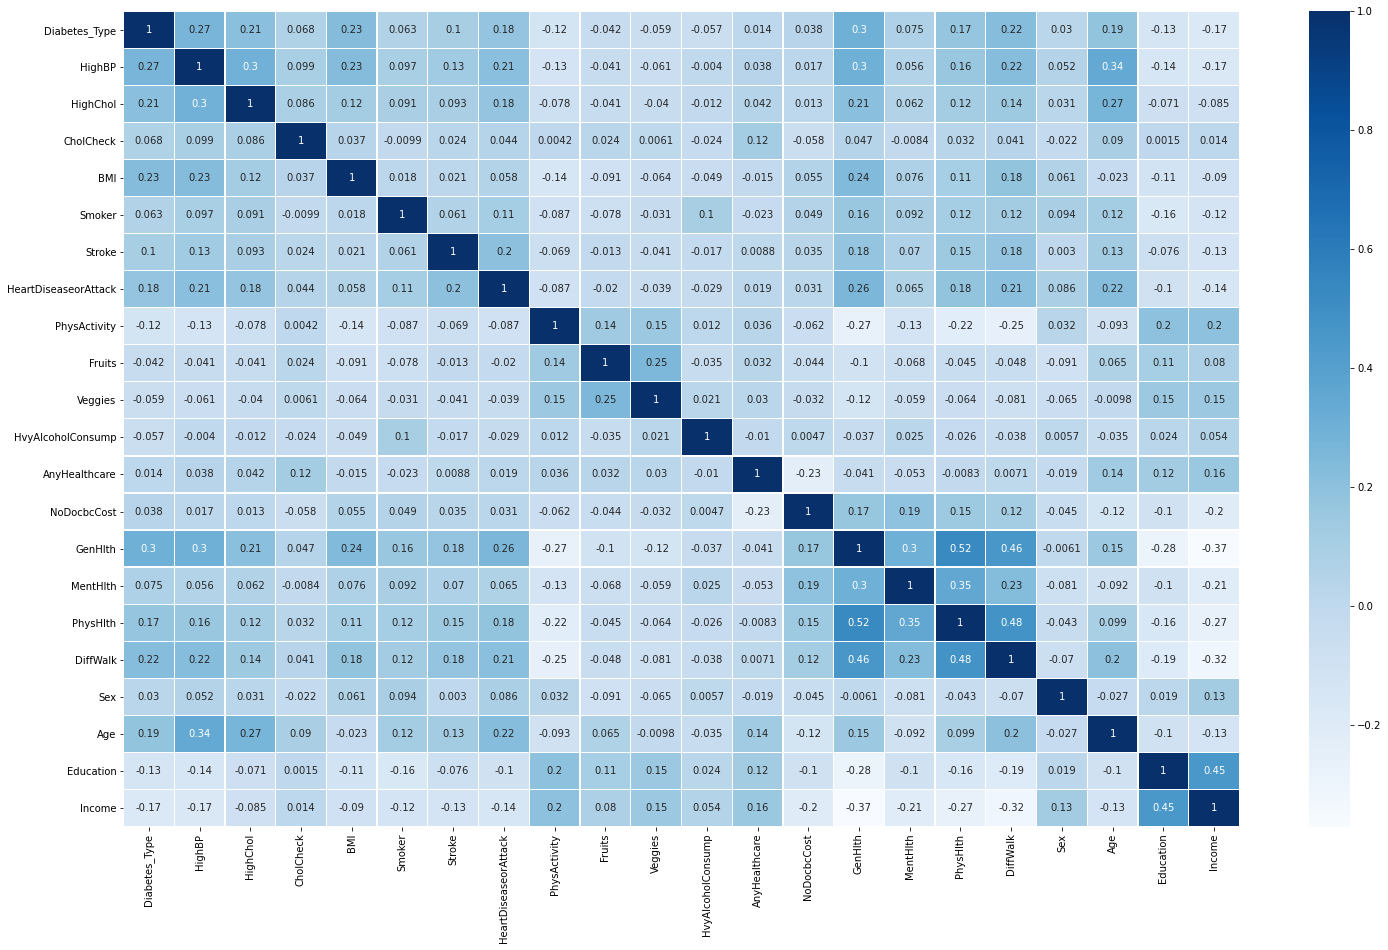

In [29]:
corr = diabetes_data.corr()
fig, ax = plt.subplots(figsize=(25,15)) 
sns.heatmap(corr,annot=True, cmap = "Blues", linewidth = 0.30)
plt.show()

Korelacija BMI-a sa drugim atributima nakon grupisanja ima male promene u odnosu na BMI bez grupisanja.

## Klasifikacija

In [30]:
def ROC(test_y, prob_y):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(test_y, prob_y)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [31]:
#Function to apply the models
def model(algorithm, train_x, test_x, train_y, test_y):
    alg = algorithm
    alg_model = alg.fit(train_x, train_y)
    global prob_y, pred_y
    prob_y = alg.predict_proba(test_x)[:,1]
    pred_y = alg_model.predict(test_x)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {} \n\nClassification Report:\n {}'
      .format(accuracy_score(test_y, pred_y), confusion_matrix(test_y, pred_y), classification_report(test_y, pred_y)))
    ROC(test_y, prob_y)

In [32]:
def feature_importances_graph(algorithm, train_x, train_y):
    alg = algorithm
    alg_model = alg.fit(train_x, train_y)
    pd.DataFrame(data = alg_model.feature_importances_*100,
                   columns = ["Importances"],
                   index = train_x.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r", figsize = (15, 10))
    plt.xlabel("Feature Importances (%)")

### Klasifikacija bez balansiranja dataseta 

In [33]:
train_x, test_x = train_test_split(diabetes_data, test_size=0.3, random_state = 42)
train_y = train_x.pop('Diabetes_Type')
test_y = test_x.pop('Diabetes_Type')

In [34]:
train_x.shape

(177576, 21)

In [35]:
test_x.shape

(76104, 21)

In [36]:
scaler = StandardScaler()
scaler.fit(train_x)
X_train = scaler.transform(train_x)
X_test = scaler.transform(test_x)

#### Random Forest

Accuracy Score: 0.8382739409229475

Confusion Matrix:
 [[61246  2934]
 [ 9374  2550]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     64180
           1       0.46      0.21      0.29     11924

    accuracy                           0.84     76104
   macro avg       0.67      0.58      0.60     76104
weighted avg       0.80      0.84      0.81     76104



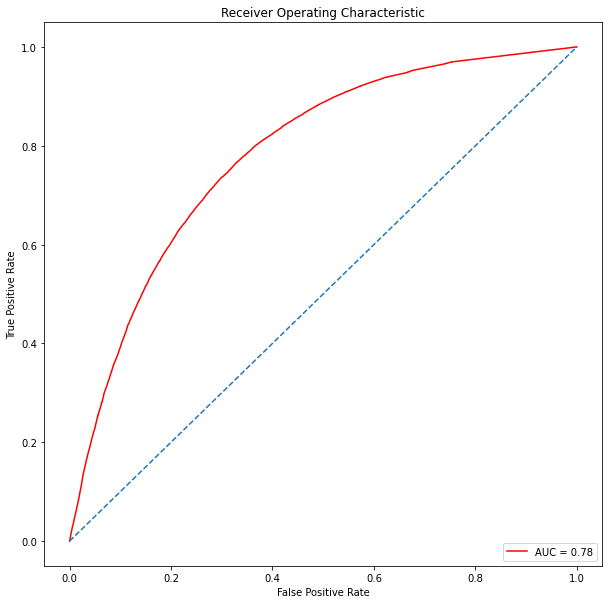

In [37]:
model(RandomForestClassifier(), train_x, test_x, train_y, test_y)

#### Logistic Regression

Accuracy Score: 0.8486544728266583

Confusion Matrix:
 [[62136  2044]
 [ 9474  2450]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92     64180
           1       0.55      0.21      0.30     11924

    accuracy                           0.85     76104
   macro avg       0.71      0.59      0.61     76104
weighted avg       0.82      0.85      0.82     76104



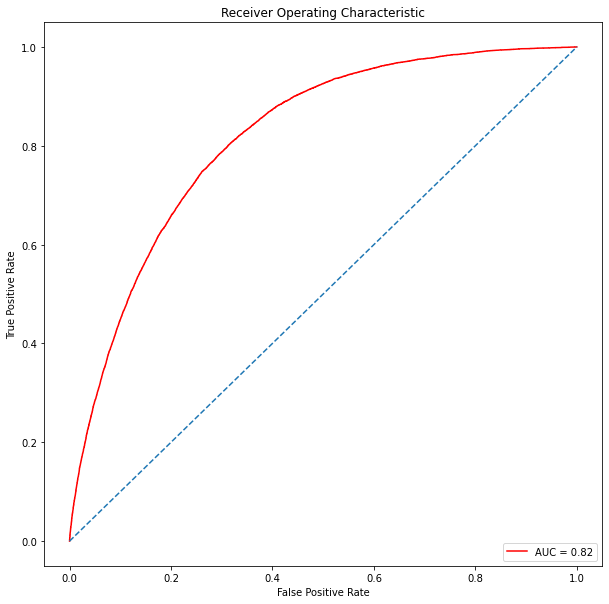

In [38]:
model(LogisticRegression(), train_x, test_x, train_y, test_y)

#### K-Nearest Neighbors

Accuracy Score: 0.8304819720382635

Confusion Matrix:
 [[60599  3581]
 [ 9320  2604]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     64180
           1       0.42      0.22      0.29     11924

    accuracy                           0.83     76104
   macro avg       0.64      0.58      0.60     76104
weighted avg       0.80      0.83      0.81     76104



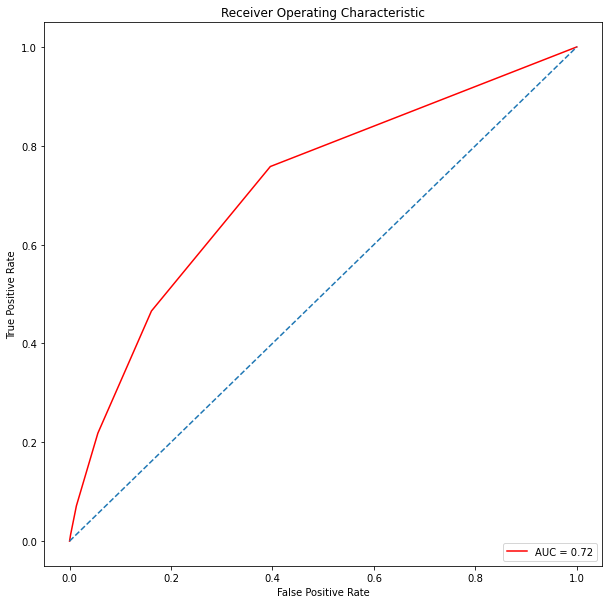

In [39]:
model(KNeighborsClassifier(), train_x, test_x, train_y, test_y)

#### Gaussian Naive Bayes

Accuracy Score: 0.7649532219068643

Confusion Matrix:
 [[51549 12631]
 [ 5257  6667]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85     64180
           1       0.35      0.56      0.43     11924

    accuracy                           0.76     76104
   macro avg       0.63      0.68      0.64     76104
weighted avg       0.82      0.76      0.79     76104



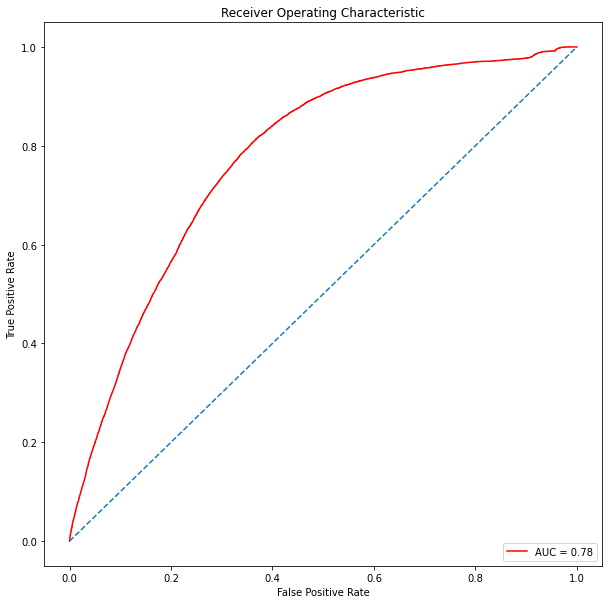

In [40]:
model(GaussianNB(), train_x, test_x, train_y, test_y)

#### Decision Tree

Accuracy Score: 0.8416640386839063

Confusion Matrix:
 [[61656  2524]
 [ 9526  2398]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     64180
           1       0.49      0.20      0.28     11924

    accuracy                           0.84     76104
   macro avg       0.68      0.58      0.60     76104
weighted avg       0.81      0.84      0.81     76104



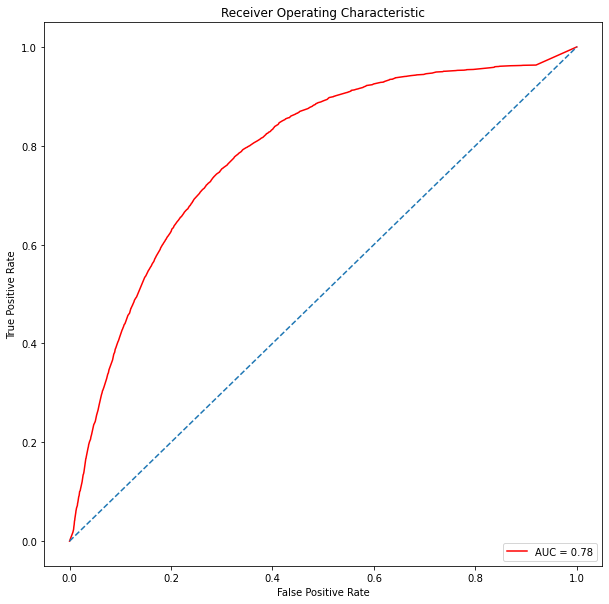

In [41]:
model(DecisionTreeClassifier(max_depth = 12), train_x, test_x, train_y, test_y)

Za klasifikaciju bez balansiranja dataseta najbolje se pokazao Logistic Regression sa tačnošću od 0.848.

### Klasifikacija sa prethodnim balansiranjem dataseta 

Za balansiranje dataseta korišćene su 3 tehnike: random under-sampling, random over-sampling i over-sampling using SMOTE.

#### RandomUnderSampler 

In [42]:
X=diabetes_data.drop(["Diabetes_Type"],axis=1)
y=diabetes_data["Diabetes_Type"]

In [43]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,4,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,2,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,3,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,3,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,2,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,5,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,1,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,3,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,2,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [44]:
rus=RandomUnderSampler(sampling_strategy=0.8)#Sampling Startegy means the ratio
x_res,y_res = rus.fit_resample(X,y)

<AxesSubplot:ylabel='Diabetes_Type'>

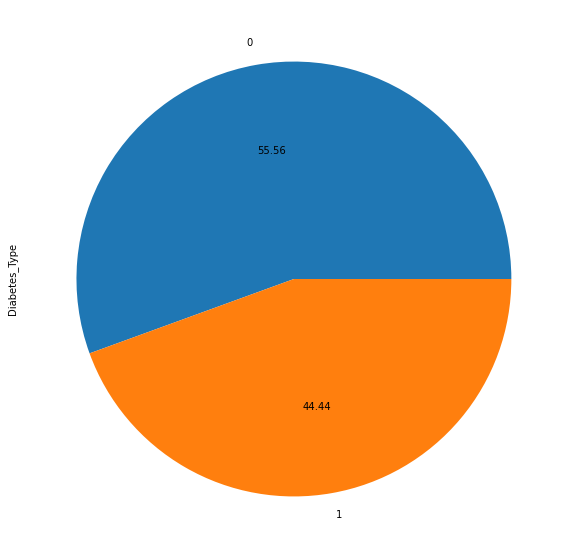

In [45]:
y_res.value_counts().plot.pie(figsize=(10, 10), autopct='%.2f')

In [48]:
x_res

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,3,1,0,0,1,1,1,...,1,0,2,0,0,0,0,7,4,5
1,1,0,1,3,1,0,0,1,0,1,...,1,0,4,0,30,1,0,7,5,3
2,0,1,1,3,1,0,1,1,0,0,...,1,0,3,10,0,0,0,5,6,8
3,1,1,1,3,1,0,0,0,1,0,...,1,0,3,0,3,0,1,12,6,6
4,1,1,1,3,1,0,0,1,1,0,...,1,0,2,0,0,0,1,11,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89943,1,0,1,2,0,0,0,0,1,1,...,1,0,3,0,15,0,0,6,5,2
89944,0,1,1,3,1,0,1,0,1,1,...,1,0,2,0,0,1,1,10,3,6
89945,1,1,1,2,0,0,1,0,1,0,...,1,0,5,15,0,1,0,13,6,4
89946,1,1,1,1,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4


In [49]:
X = x_res
y = y_res

In [50]:
X_train_rus, X_test_rus, y_train_rus,y_test_rus = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [51]:
scaler = StandardScaler()
scaler.fit(X_train_rus)
X_train = scaler.transform(X_train_rus)
X_test = scaler.transform(X_test_rus)

#### Random Forest

Accuracy Score: 0.7209005002779322

Confusion Matrix:
 [[7425 2668]
 [2353 5544]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75     10093
           1       0.68      0.70      0.69      7897

    accuracy                           0.72     17990
   macro avg       0.72      0.72      0.72     17990
weighted avg       0.72      0.72      0.72     17990



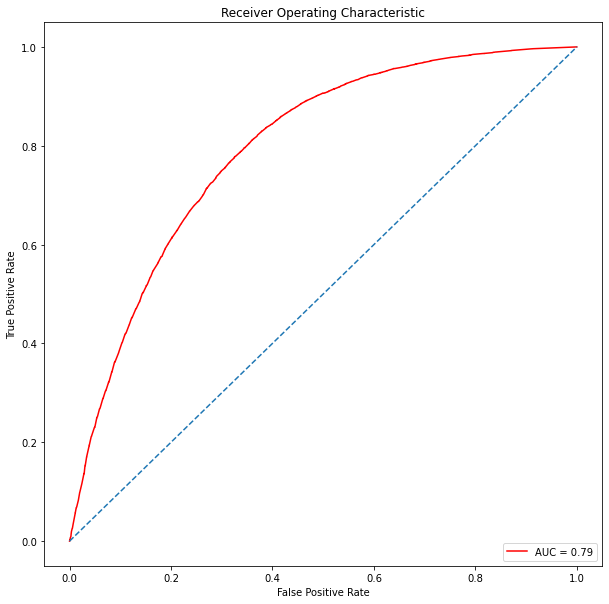

In [52]:
model(RandomForestClassifier(), X_train_rus, X_test_rus, y_train_rus, y_test_rus)

#### Logistic Regression

Accuracy Score: 0.7415786548082268

Confusion Matrix:
 [[7744 2349]
 [2300 5597]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77     10093
           1       0.70      0.71      0.71      7897

    accuracy                           0.74     17990
   macro avg       0.74      0.74      0.74     17990
weighted avg       0.74      0.74      0.74     17990



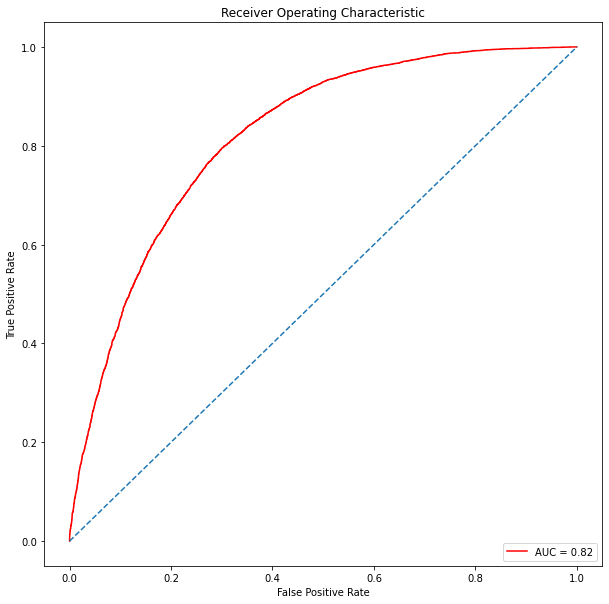

In [53]:
model(LogisticRegression(), X_train_rus, X_test_rus, y_train_rus, y_test_rus)

#### K-Nearest Neighbors

Accuracy Score: 0.705780989438577

Confusion Matrix:
 [[7364 2729]
 [2564 5333]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.74     10093
           1       0.66      0.68      0.67      7897

    accuracy                           0.71     17990
   macro avg       0.70      0.70      0.70     17990
weighted avg       0.71      0.71      0.71     17990



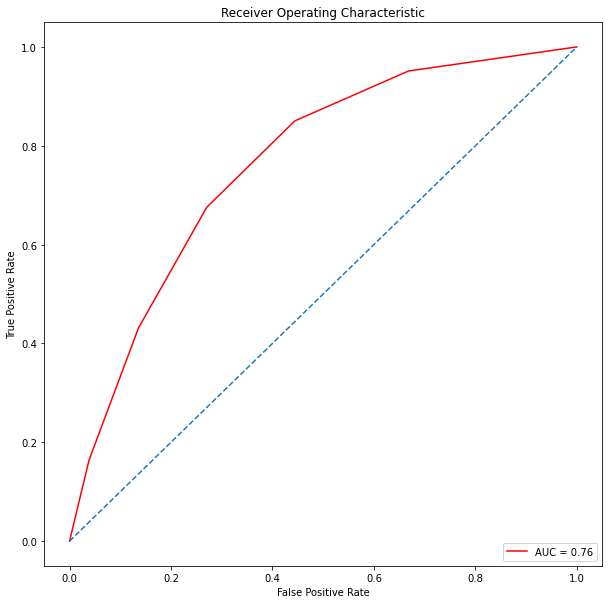

In [54]:
model(KNeighborsClassifier(), X_train_rus, X_test_rus, y_train_rus, y_test_rus)

#### Gaussian Naive Bayes

Accuracy Score: 0.7105058365758755

Confusion Matrix:
 [[7428 2665]
 [2543 5354]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74     10093
           1       0.67      0.68      0.67      7897

    accuracy                           0.71     17990
   macro avg       0.71      0.71      0.71     17990
weighted avg       0.71      0.71      0.71     17990



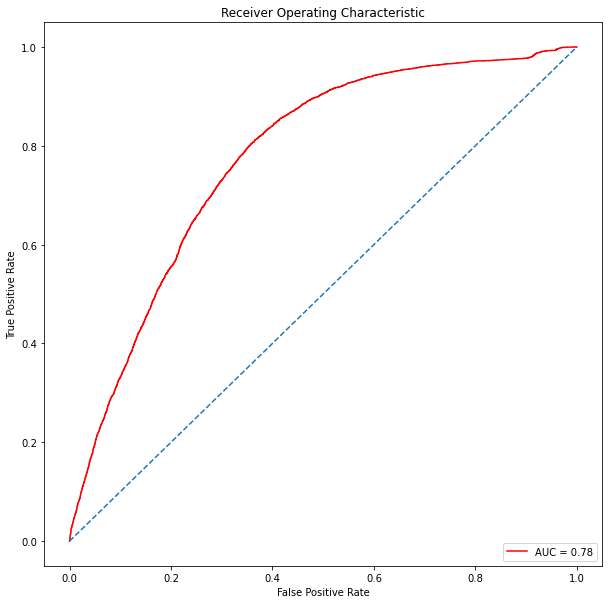

In [55]:
model(GaussianNB(), X_train_rus, X_test_rus, y_train_rus, y_test_rus)

#### Decision Tree

Accuracy Score: 0.7250694830461367

Confusion Matrix:
 [[7376 2717]
 [2229 5668]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75     10093
           1       0.68      0.72      0.70      7897

    accuracy                           0.73     17990
   macro avg       0.72      0.72      0.72     17990
weighted avg       0.73      0.73      0.73     17990



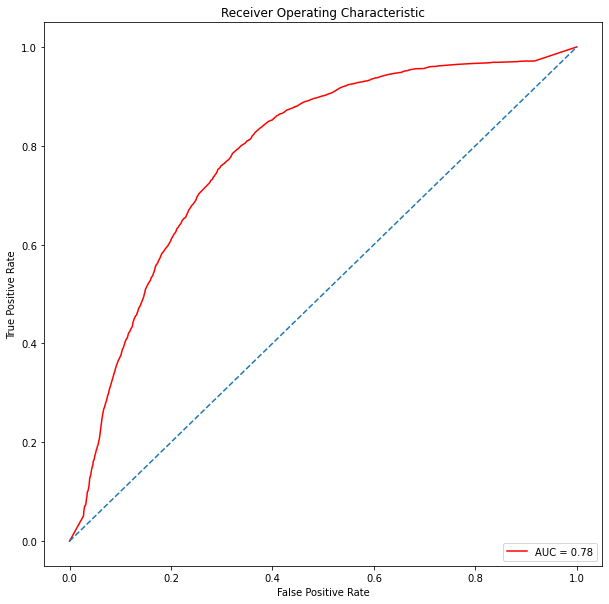

In [56]:
model(DecisionTreeClassifier(max_depth = 12), X_train_rus, X_test_rus, y_train_rus, y_test_rus)

Za klasifikaciju korišćenjem RandomUnderSampler-a najbolje se pokazao Logistic Regression sa tačnošću od 0.741.

#### RandomOverSampler

In [82]:
X=diabetes_data.drop(["Diabetes_Type"],axis=1)
y=diabetes_data["Diabetes_Type"]

In [83]:
ros=RandomOverSampler(sampling_strategy=0.8)#Sampling Startegy means the ratio
x_res,y_res = ros.fit_resample(X,y)

In [84]:
X = x_res
y = y_res

In [85]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,4,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,2,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,3,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,3,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,2,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384660,0,0,1,5,0,0,0,0,1,1,...,1,0,3,0,0,0,0,10,6,8
384661,1,1,1,2,0,0,1,1,1,1,...,1,0,3,5,0,0,0,11,4,7
384662,0,0,1,3,0,0,0,1,1,1,...,1,0,3,0,0,0,0,6,6,8
384663,1,0,1,3,0,1,0,0,1,0,...,1,0,1,1,0,0,1,13,4,6


<AxesSubplot:ylabel='Diabetes_Type'>

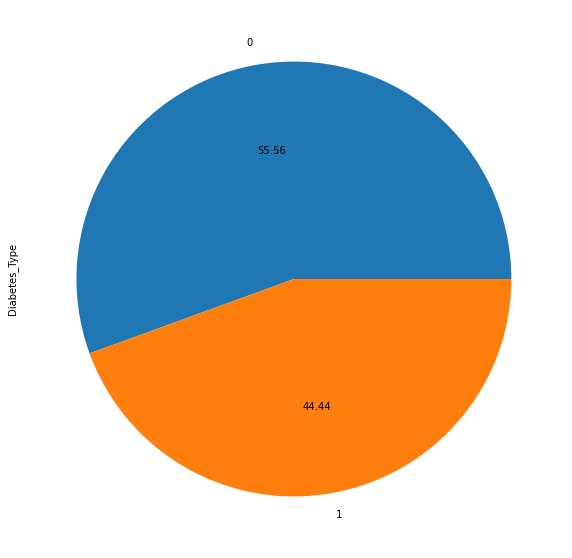

In [86]:
y_res.value_counts().plot.pie(figsize=(10, 10), autopct='%.2f')

In [87]:
X_train_ros, X_test_ros, y_train_ros,y_test_ros = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [88]:
scaler = StandardScaler()
scaler.fit(X_train_ros)
X_train = scaler.transform(X_train_ros)
X_test = scaler.transform(X_test_ros)

#### Random Forest

Accuracy Score: 0.9115334121898275

Confusion Matrix:
 [[37425  5336]
 [ 1470 32702]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92     42761
           1       0.86      0.96      0.91     34172

    accuracy                           0.91     76933
   macro avg       0.91      0.92      0.91     76933
weighted avg       0.92      0.91      0.91     76933



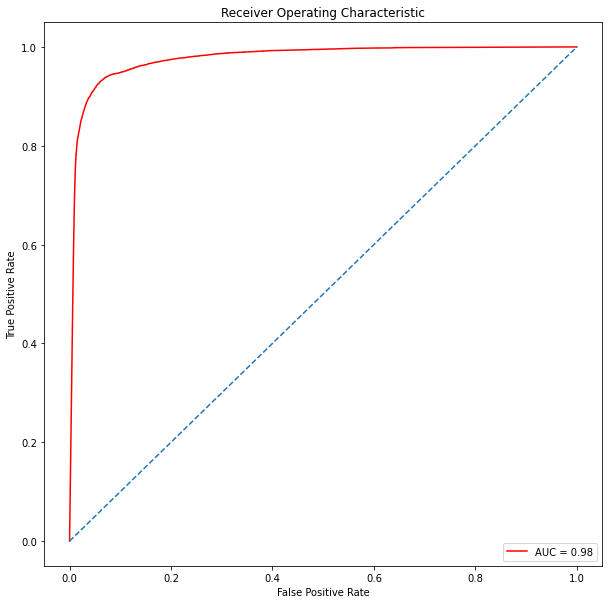

In [89]:
model(RandomForestClassifier(), X_train_ros, X_test_ros, y_train_ros, y_test_ros)

#### Logistic Regression

Accuracy Score: 0.740670453511497

Confusion Matrix:
 [[32944  9817]
 [10134 24038]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77     42761
           1       0.71      0.70      0.71     34172

    accuracy                           0.74     76933
   macro avg       0.74      0.74      0.74     76933
weighted avg       0.74      0.74      0.74     76933



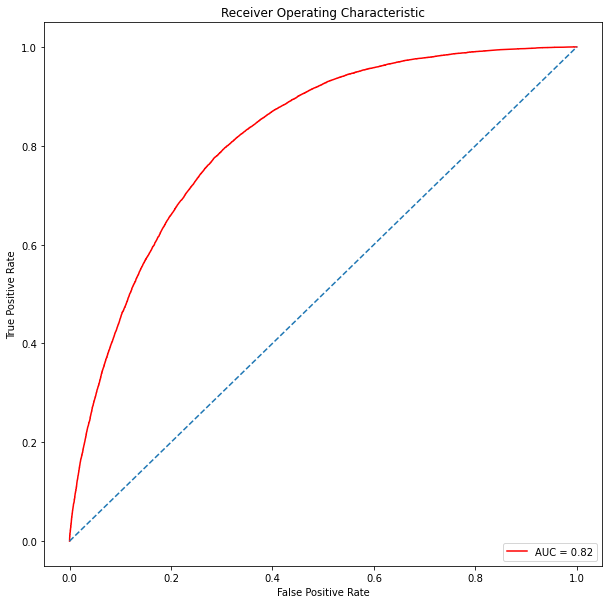

In [65]:
model(LogisticRegression(), X_train_ros, X_test_ros, y_train_ros, y_test_ros)

#### K-Nearest Neighbors

Accuracy Score: 0.7929497094874761

Confusion Matrix:
 [[31286 11475]
 [ 4454 29718]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80     42761
           1       0.72      0.87      0.79     34172

    accuracy                           0.79     76933
   macro avg       0.80      0.80      0.79     76933
weighted avg       0.81      0.79      0.79     76933



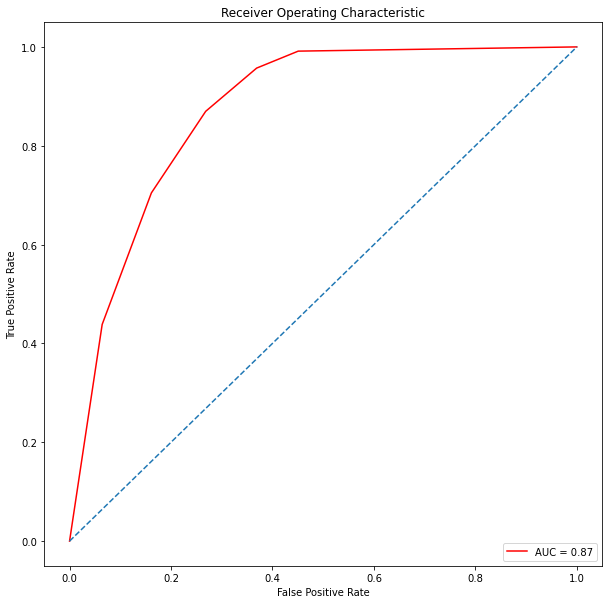

In [66]:
model(KNeighborsClassifier(), X_train_ros, X_test_ros, y_train_ros, y_test_ros)

#### Gaussian Naive Bayes

Accuracy Score: 0.7134129697269053

Confusion Matrix:
 [[31813 10948]
 [11100 23072]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74     42761
           1       0.68      0.68      0.68     34172

    accuracy                           0.71     76933
   macro avg       0.71      0.71      0.71     76933
weighted avg       0.71      0.71      0.71     76933



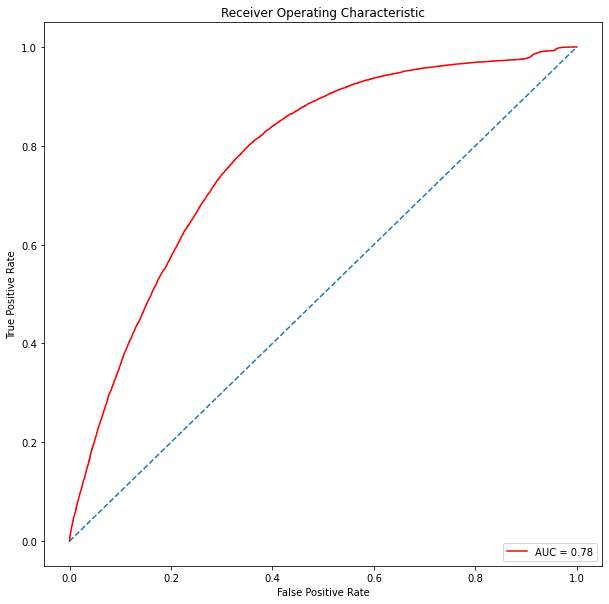

In [67]:
model(GaussianNB(), X_train_ros, X_test_ros, y_train_ros, y_test_ros)

#### Decision Tree

Accuracy Score: 0.7532528303848803

Confusion Matrix:
 [[32469 10292]
 [ 8691 25481]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77     42761
           1       0.71      0.75      0.73     34172

    accuracy                           0.75     76933
   macro avg       0.75      0.75      0.75     76933
weighted avg       0.75      0.75      0.75     76933



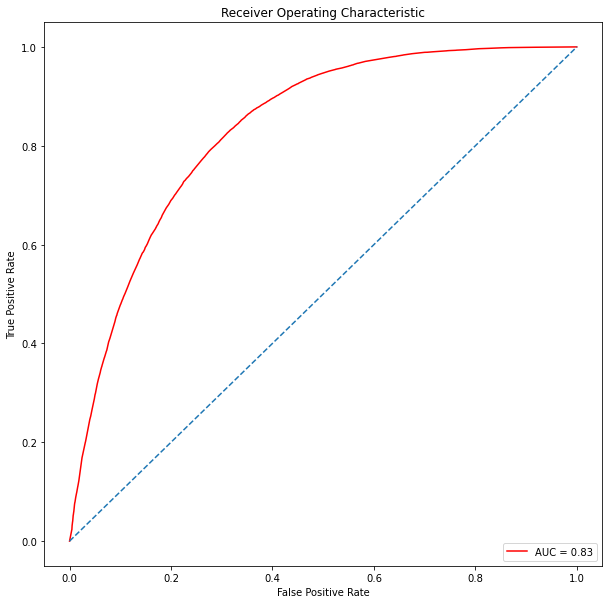

In [68]:
model(DecisionTreeClassifier(max_depth = 12), X_train_ros, X_test_ros, y_train_ros, y_test_ros)

Za klasifikaciju korišćenjem RandomOverSampler-a najbolje se pokazao Random Forest sa tačnošću od 0.911.

#### SMOOTE

In [69]:
X=diabetes_data.drop(["Diabetes_Type"],axis=1)
y=diabetes_data["Diabetes_Type"]

In [70]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,4,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,2,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,3,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,3,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,2,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,5,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,1,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,3,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,2,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [71]:
smt = SMOTE(random_state=42)
x_res,y_res = smt.fit_resample(X,y)

<AxesSubplot:ylabel='Diabetes_Type'>

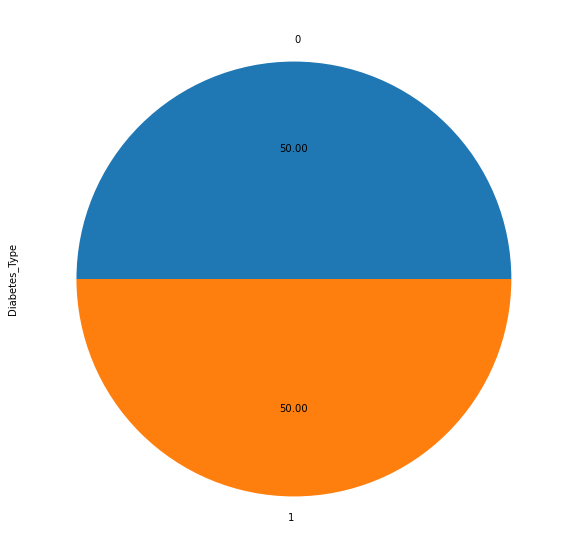

In [72]:
y_res.value_counts().plot.pie(figsize=(10, 10), autopct='%.2f')

In [73]:
X = x_res
y = y_res

In [81]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,4,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,2,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,3,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,3,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,2,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427401,1,1,1,3,0,0,0,0,1,1,...,1,0,3,0,0,0,0,10,5,5
427402,1,1,1,4,1,0,0,0,1,1,...,1,0,2,0,0,0,0,11,5,4
427403,0,1,1,3,0,0,0,0,0,1,...,1,0,4,0,0,1,0,12,2,1
427404,0,0,1,4,0,0,0,1,1,0,...,1,0,2,0,0,0,1,5,5,6


In [74]:
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [75]:
scaler = StandardScaler()
scaler.fit(X_train_smt)
X_train = scaler.transform(X_train_smt)
X_test = scaler.transform(X_test_smt)

#### Random Forest

Accuracy Score: 0.8452539715963595

Confusion Matrix:
 [[34213  8703]
 [ 4525 38041]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84     42916
           1       0.81      0.89      0.85     42566

    accuracy                           0.85     85482
   macro avg       0.85      0.85      0.84     85482
weighted avg       0.85      0.85      0.84     85482



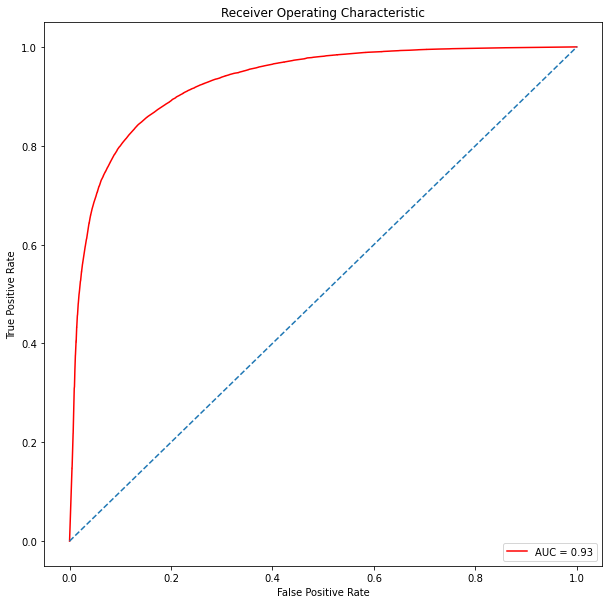

In [76]:
model(RandomForestClassifier(), X_train_smt, X_test_smt, y_train_smt, y_test_smt)

#### Logistic Regression

Accuracy Score: 0.7320839474977188

Confusion Matrix:
 [[30631 12285]
 [10617 31949]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73     42916
           1       0.72      0.75      0.74     42566

    accuracy                           0.73     85482
   macro avg       0.73      0.73      0.73     85482
weighted avg       0.73      0.73      0.73     85482



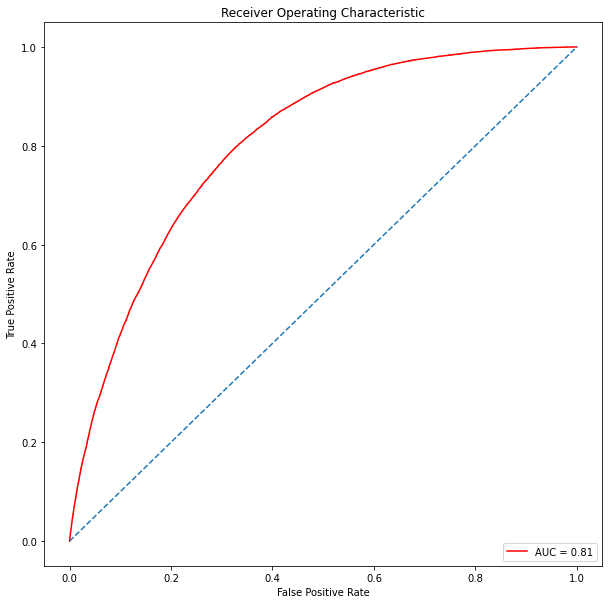

In [77]:
model(LogisticRegression(), X_train_smt, X_test_smt, y_train_smt, y_test_smt)

#### K-Nearest Neighbors

Accuracy Score: 0.7723614328162655

Confusion Matrix:
 [[30068 12848]
 [ 6611 35955]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.76     42916
           1       0.74      0.84      0.79     42566

    accuracy                           0.77     85482
   macro avg       0.78      0.77      0.77     85482
weighted avg       0.78      0.77      0.77     85482



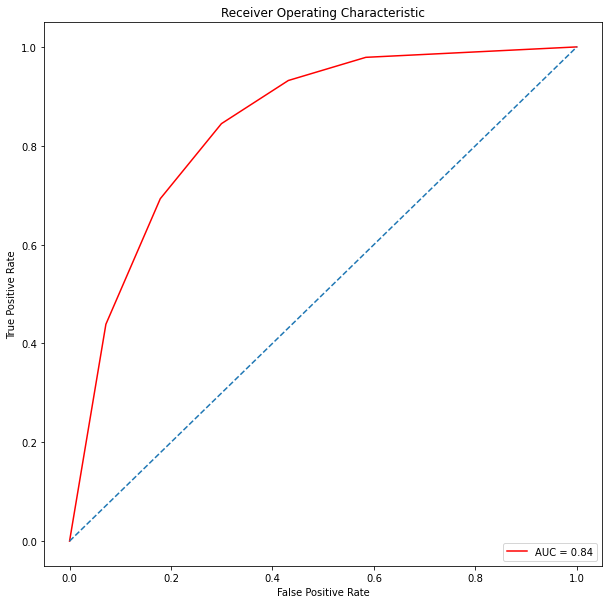

In [78]:
model(KNeighborsClassifier(), X_train_smt, X_test_smt, y_train_smt, y_test_smt)

#### Gaussian Naive Bayes

Accuracy Score: 0.7139982686413514

Confusion Matrix:
 [[27282 15634]
 [ 8814 33752]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.64      0.69     42916
           1       0.68      0.79      0.73     42566

    accuracy                           0.71     85482
   macro avg       0.72      0.71      0.71     85482
weighted avg       0.72      0.71      0.71     85482



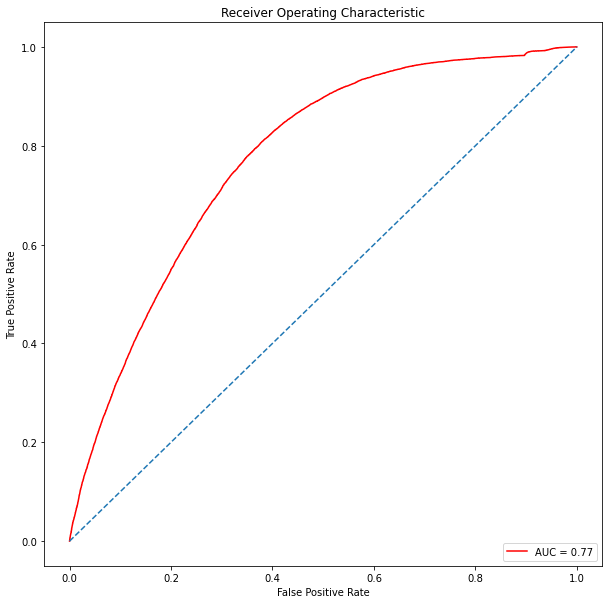

In [79]:
model(GaussianNB(), X_train_smt, X_test_smt, y_train_smt, y_test_smt)

#### Decision Tree

Accuracy Score: 0.7375821810439624

Confusion Matrix:
 [[28772 14144]
 [ 8288 34278]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.67      0.72     42916
           1       0.71      0.81      0.75     42566

    accuracy                           0.74     85482
   macro avg       0.74      0.74      0.74     85482
weighted avg       0.74      0.74      0.74     85482



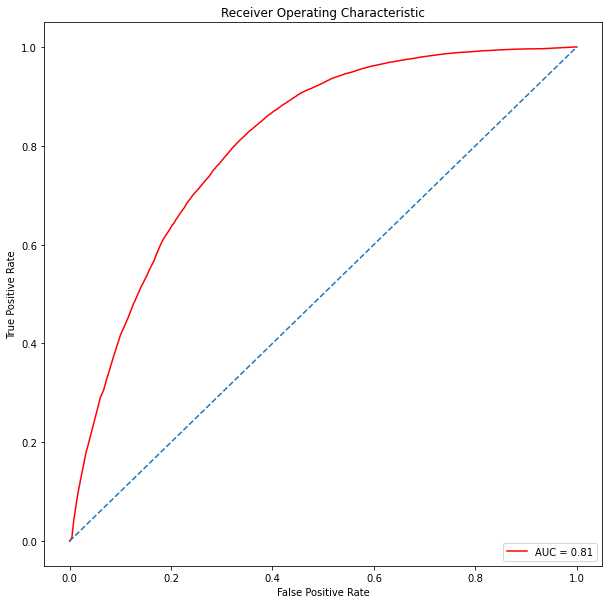

In [80]:
model(DecisionTreeClassifier(max_depth = 12), X_train_smt, X_test_smt, y_train_smt, y_test_smt)

Za klasifikaciju korišćenjem SMOOTE najbolje se pokazao Random Forest sa tačnošću od 0.845.

#### Pregled

Najbolje se pokazala klasifikacija korišćenjem RandomOverSampler-a i Random Forest algoritam sa tačnošću od 0.911.

Doprinos atributa kod ove klasifikacije:

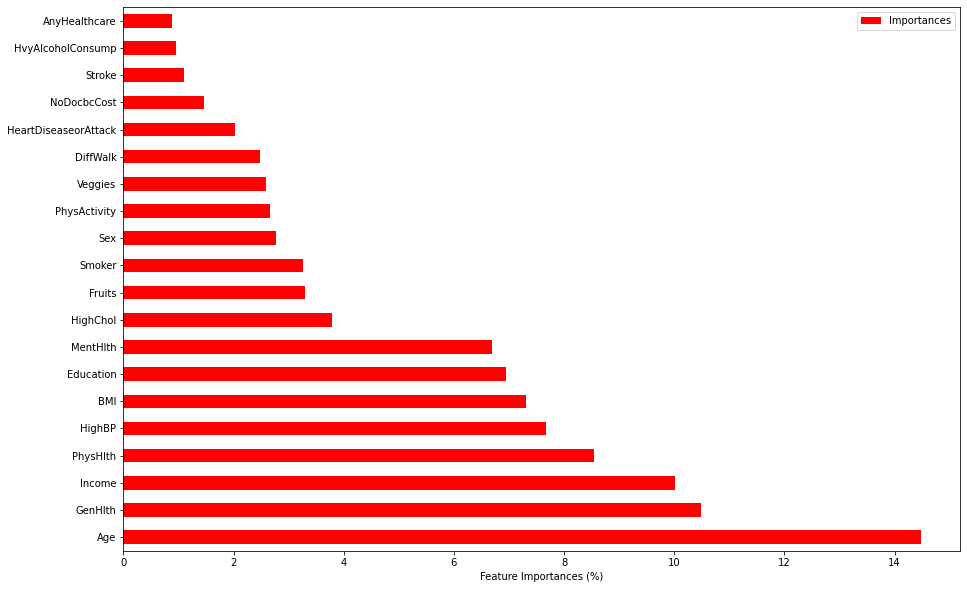

In [90]:
feature_importances_graph(RandomForestClassifier(), X_train_ros, y_train_ros)

Za inicijalizaciju RandomForestClassifier su korišćene default vrednosti. Možda će tačnost biti veća sa podešavanjem parametara.    
  
Pokušaj pronalaženja najboljih parametara korišćenjem Grid Search-a:

In [119]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [None, 90, 100, 110],
    'max_features': ["auto", "log2", 2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [100, 200]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [120]:
grid_search.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None, 90, 100, 110],
                         'max_features': ['auto', 'log2', 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [100, 200]},
             verbose=2)

In [121]:
print(grid_search.best_score_)

0.881091337651888


In [122]:
print(grid_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Vidimo da je sa dodeljenim parametrima tačnost manja. 

### Zaključak

U ovom datasetu nisu postojale vrednosti koje nedostaju.   
Dataset je nebalansiran. Primenjene su 3 tehnike za pokušaj rešavanja ovog problema. Najbolje se pokazala over sampling tehnika korišćenjem RandomOverSampler-a.